In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import tensorflow_transform as tft
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Activation, Flatten, MaxPooling2D 

Using TensorFlow backend.


In [2]:
# List of all the datasets that can be used
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'cos_e',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'forest_fires',
 'gap',
 'ge

In [3]:
ds,info = tfds.load('mnist', shuffle_files=True, with_info=True)
type(ds)
print(ds['train'])

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [4]:
# Taking a look at the dataset
train_sample = ds['train'].batch(1).take(1)
for data in train_sample:
    print(data['image'].shape)

(1, 28, 28, 1)


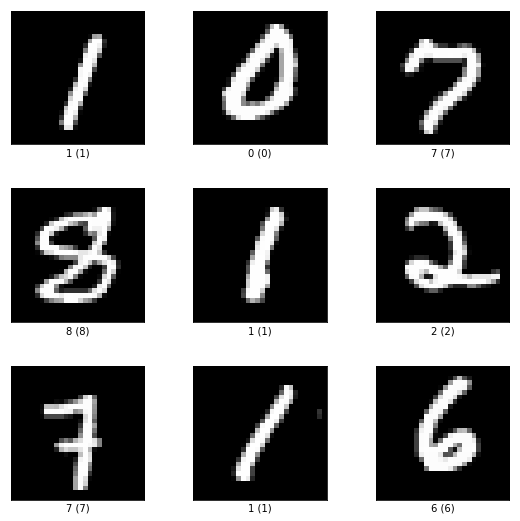

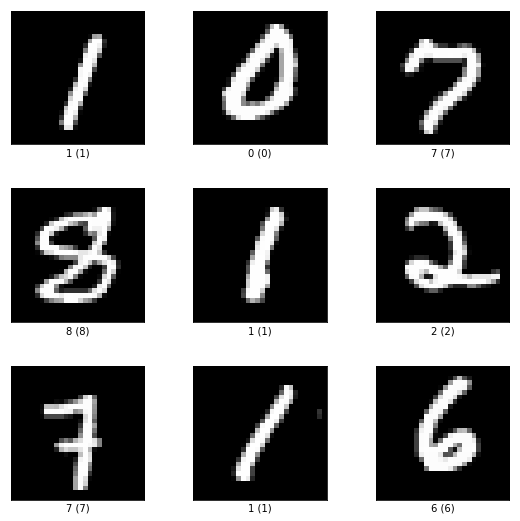

In [5]:
# Lets take a look at the images
tfds.show_examples(ds['train'], info)

In [6]:
# Difference with loading in data from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_train[1].shape)

(60000, 28, 28) (60000,)
(28, 28)


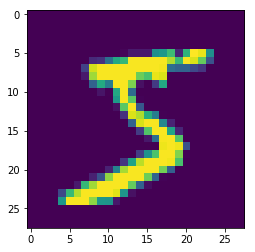

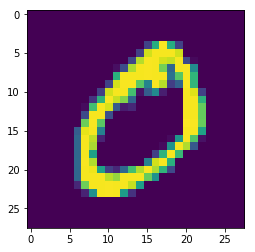

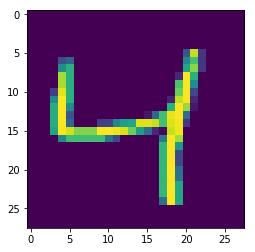

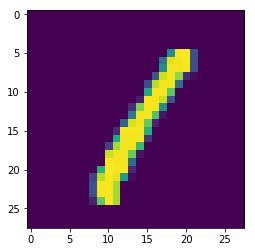

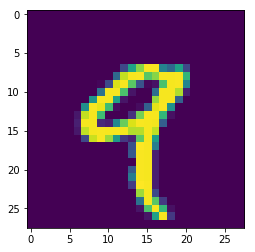

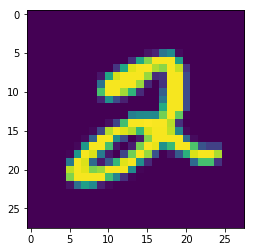

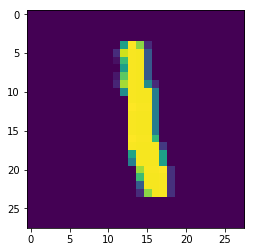

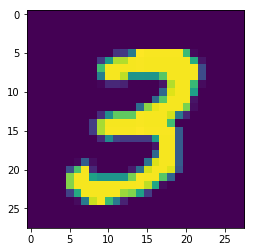

In [7]:
# Lets take a look at the images
for i in range(8):
    plt.figure()
    plt.imshow(x_train[i])

In [8]:
# Standardize the data between zero and 1
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32)/255

# Explicitly declaring image to have of 1
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_train.reshape(x_train.shape[0], 1, 28, 28)


x_train.shape

(60000, 1, 28, 28)

In [9]:
# Labels need to be in 1 hot format
y_train_hot = np.zeros((y_train.size, y_train.max()+1))
y_train_hot[np.arange(y_train.size), y_train] = 1

y_test_hot = np.zeros((y_test.size, y_test.max()+1))
y_test_hot[np.arange(y_test.size), y_test] = 1


In [10]:
# Setting up the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), strides=1, padding='same',input_shape=(1,28,28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 32)         3616      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 14, 32)         9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2250      
Total params: 15,114
Trainable params: 15,114
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
model.fit(x_train, y_train_hot)
# Keeps crashing here check compatability of keras and tensorflow versions

Epoch 1/1


In [ ]:
# model needs to be evaluated check evaluate method